In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14

In [27]:
df = pd.read_csv('insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)

df.head()


Number of rows and columns in the data set:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


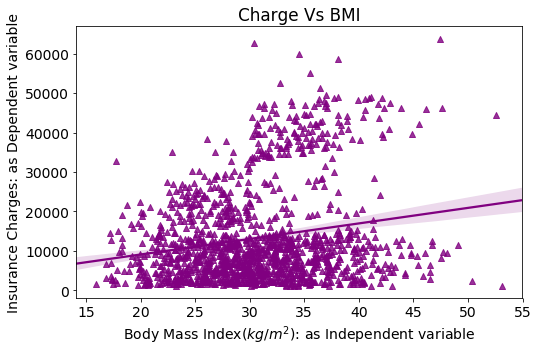

In [28]:
sns.regplot(x='bmi',y='charges',data=df,marker='^',color='purple')
plt.xlabel('Body Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [29]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Missing value in the dataset')

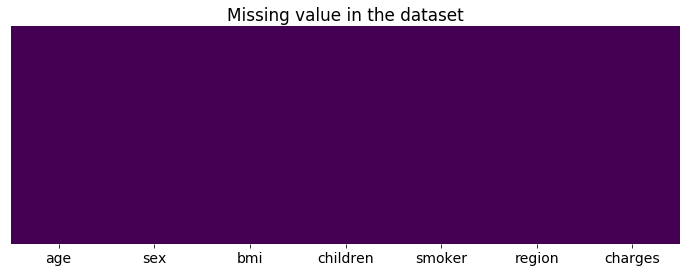

In [30]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


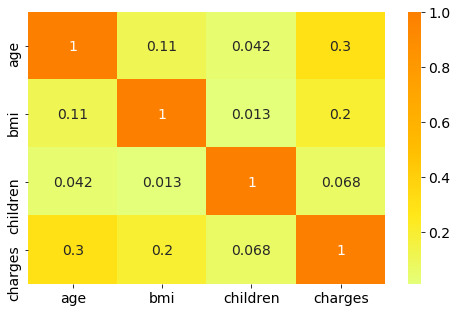

In [32]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)


Plots



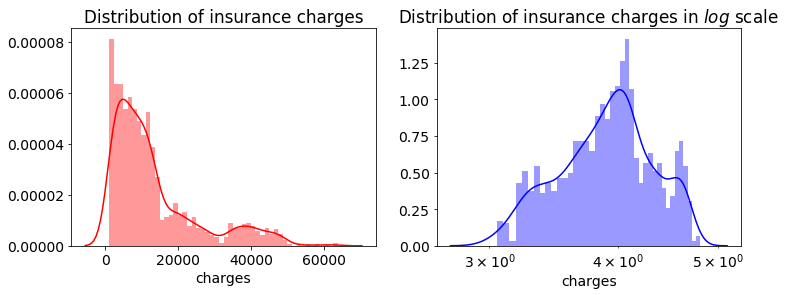

In [33]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log')

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

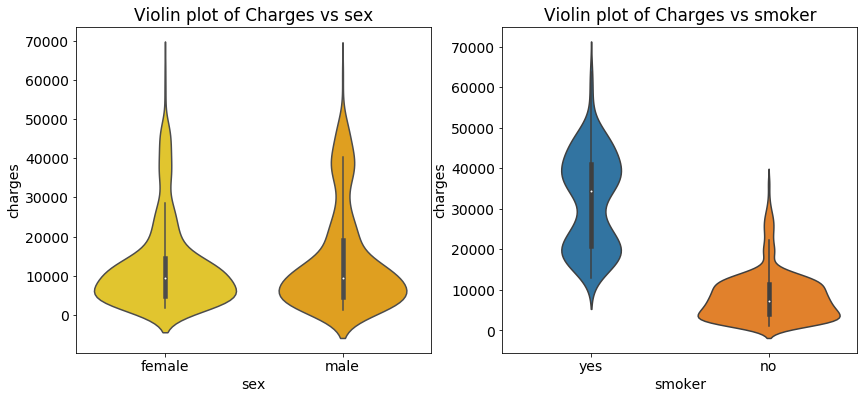

In [34]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,paltette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

Text(0.5, 1.0, 'Violin plot of charges vs children')

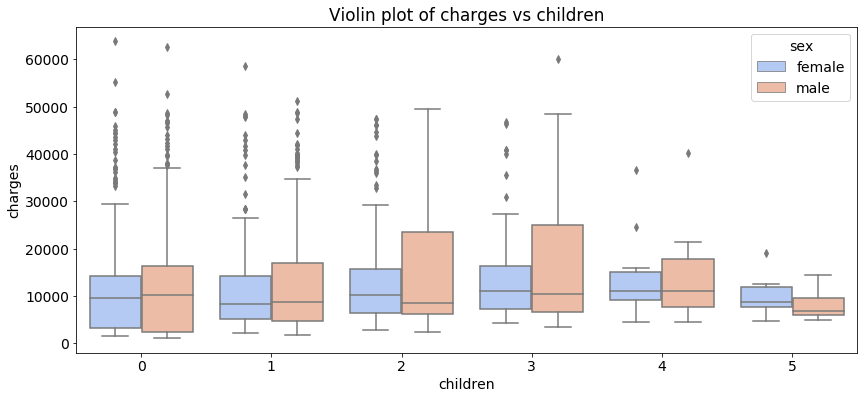

In [35]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='coolwarm')
plt.title('Violin plot of charges vs children')

In [36]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Violin plot of charges vs children')

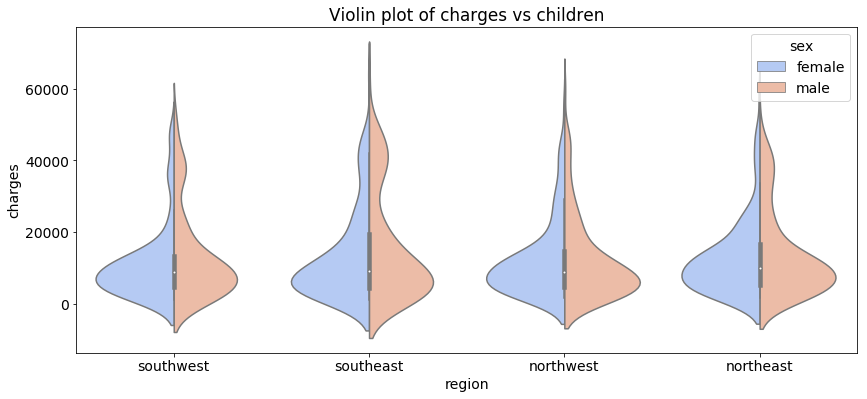

In [37]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='coolwarm',split=True)
plt.title('Violin plot of charges vs children')

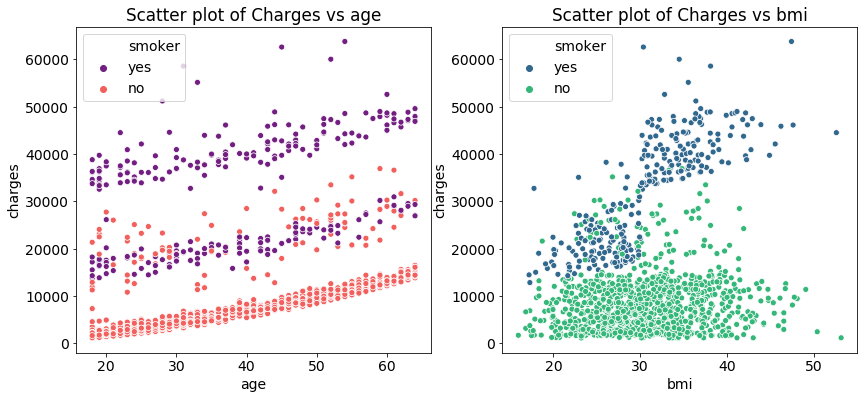

In [38]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [39]:
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = None, prefix_sep='_',columns = categorical_columns,drop_first =True,dtype='int8')

In [40]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'sex_male' 'children_1' 'children_2' 'children_3'
 'children_4' 'children_5' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [41]:
df_encode['age_smoker_yes'] = df_encode['age']* df_encode['smoker_yes']
df_encode['age_sex_male'] = df_encode['age']* df_encode['sex_male']

df_encode.shape

(1338, 15)

In [42]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1)
y = df_encode['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)

R_square = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) is:', mse)
print('The R square obtained is:',R_square)

The Mean Square Error(MSE) is: 35328444.43834121
The R square obtained is: 0.7291764015825422



Backward Elimination



In [47]:
import statsmodels.api as sm
X_train_0 = sm.add_constant(X_train)
X_test_0 = sm.add_constant(X_test)
ols = sm.OLS(endog=y_train, exog=X_train_0).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     206.8
Date:                Sat, 31 Aug 2019   Prob (F-statistic):          1.24e-272
Time:                        10:08:50   Log-Likelihood:                -9482.8
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     921   BIC:                         1.907e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.092e+04   1338.159  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [54]:
y_pred_ols = ols.predict(X_test_0)
y_pred_ols.head()

918    11129.225340
755     6878.569870
207    31913.171049
520     9852.325433
695     8438.975730
dtype: float64